Detect persian numbers using Knn.


In [53]:
!rm -r dataset.py.2

In [54]:
!wget https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset.py

--2025-01-03 04:29:06--  https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset.py
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset.py [following]
--2025-01-03 04:29:07--  https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2025-01-03 04:29:07 (46.5 MB/s) - ‘dataset.py’ saved [917/917]



In [55]:
!cat dataset.py


# for more information read "19-Intro2ML-HodaDataset.ipynb"
import cv2
import numpy as np
from scipy import io

def load_hoda(training_sample_size=1000, test_sample_size=200, size=5):
    #load dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat('./dataset/Data_hoda_full.mat')

    #test and training set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])

    #resize
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    #reshape
    X_train = np.reshape(X_train_5by5, [-1,size**2])
    X_test = np.reshape(X_test_5by_5, [-1,size**2])
    
    return X_train, y_train, X_test, y_test

In [65]:
import importlib
import cv2
import dataset
#importlib.reload(dataset)
from dataset import load_hoda
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [57]:
!wget https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat -P dataset

--2025-01-03 04:29:34--  https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat [following]
--2025-01-03 04:29:34--  https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989009 (3.8M) [application/octet-stream]
Saving to: ‘dataset/Data_hoda_full.mat’

Data_hoda_full.mat  100%[===================>]   3.80M  --.-KB/s    in 0.07s   

2025-01

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>

In [66]:
X_train, y_train, X_test, y_test = load_hoda()

In [67]:
X_train.shape

(1000, 25)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ایجاد طبقه بند k-nn</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
</div>


In [68]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
# Read the input image (make sure it's a binary image)
image = cv2.imread('persian-digits.jpg', cv2.IMREAD_GRAYSCALE)

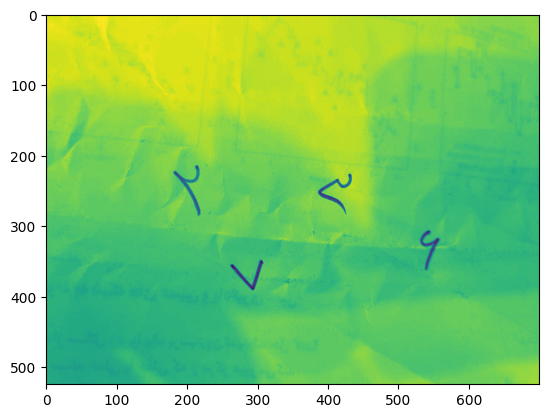

In [62]:
plt.imshow(image)

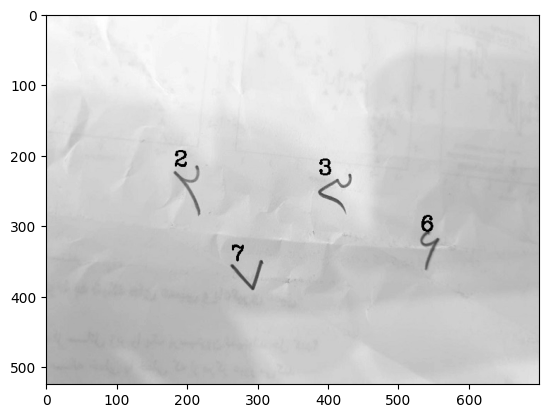

In [70]:
# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
binary_image = 255-binary_image

# Use connectedComponentsWithStats to obtain labels and bounding boxes
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Iterate through each connected component
for label in range(1, num_labels):
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]

    # Remove points in it
    if(w>5 and h>5):

        # Crop the connected component using the bounding box
        connected_component = binary_image[y:y+h, x:x+w]

        # Resized each target for predict
        resized=cv2.resize(connected_component,(5,5))
        X=resized.reshape(1,25)

        # Write predicted number in the image
        cv2.putText(image, str(neigh.predict(X)[0]) , (x,y), cv2.FONT_HERSHEY_COMPLEX, 1, (0,170,0), 2)

#Display image with predicted numbers
plt.imshow(image,cmap='gray')